## Final Project: Data Science Programme — Cambridge University & Flatiron School

## About Dataset
### Context
During pregnancy, some women can experience high blood sugar levels (hyperglycemia). This increase in blood sugar levels is called Gestational diabetes mellitus or GDM. Similar to Type 1 and Type 2 diabetes, Pregnancy diabetes interrupts sugar/glucose metabolism.

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their Glucose, Blood Pressure, Skin Thickness, Insulin levels, BMI, age and a Diabetes Pedigree function.

In [19]:
#Import basic libraries
import os
import pandas as pd # data processing
import numpy as np # linear algebra

#Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")



In [2]:
#Importing the dataset:
dataframe = pd.read_csv('./Project/diabetes.csv')
#Viewing first five rows of dataset
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Information
- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness : Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [3]:
#Checking Dataset shape:
dataframe.shape

(768, 9)

In [4]:
#Checking Dataset Details, datatypes, counts:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking duplicate values: 
dataframe[dataframe.duplicated()]
dataframe.duplicated().sum()

0

In [6]:
# Checking any NULL values:
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Observation: 
- The given dataset has no missing values
- There is no NULL value but missing data seems to be filled with 0

In [7]:
# Cheking unique values: 
dataframe.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


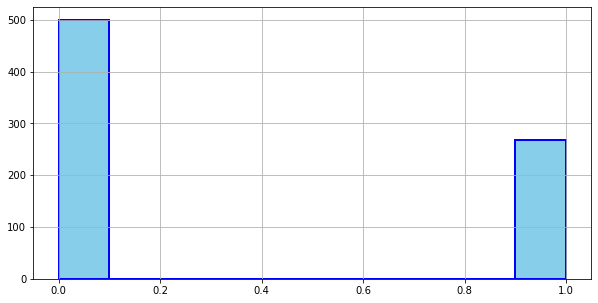

In [8]:
#Count of Outcome "0(Non-Diabetic) and 1(Diabetic)"
dataframe['Outcome'].hist(figsize = (10,5), color = 'skyblue', ec = 'blue', lw = 2)
print("Number of samples for Outcome 0 are : ",len(dataframe[dataframe['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(dataframe[dataframe['Outcome']==1]))

<AxesSubplot:xlabel='Outcome', ylabel='count'>

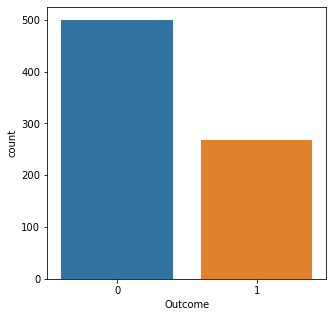

In [9]:
#Count of Outcome - Plot using seaborn:
plt.figure(figsize=(5,5))
sns.countplot(dataframe["Outcome"])

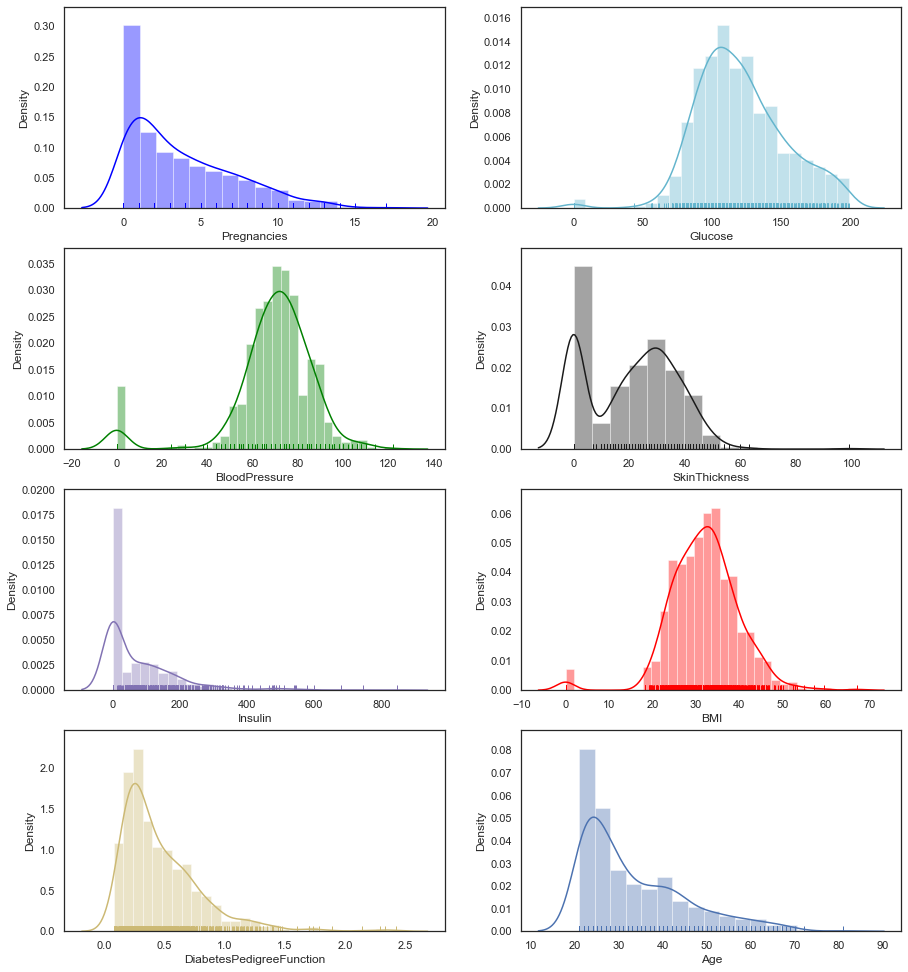

In [11]:
#Distribution of data for each column:
#Distplot For Various Features
columns=dataframe.columns
columns=list(columns)
columns.pop()

#Graphs to be plotted with these colors
colours=['blue','c','green','k','m','red','y','b']
sns.set(rc={'figure.figsize':(15,17)})
sns.set_style(style='white')
for i in range(len(columns)):
    
    plt.subplot(4,2,i+1)
    sns.distplot(dataframe[columns[i]], hist=True, rug=True, color=colours[i])

#### Observation:

- There are no categorical features
- Features like Pregnancies, SkinThickness, Insulin, DiabetesPedigreeFunction and Age are right-skewed
- There are few outliers

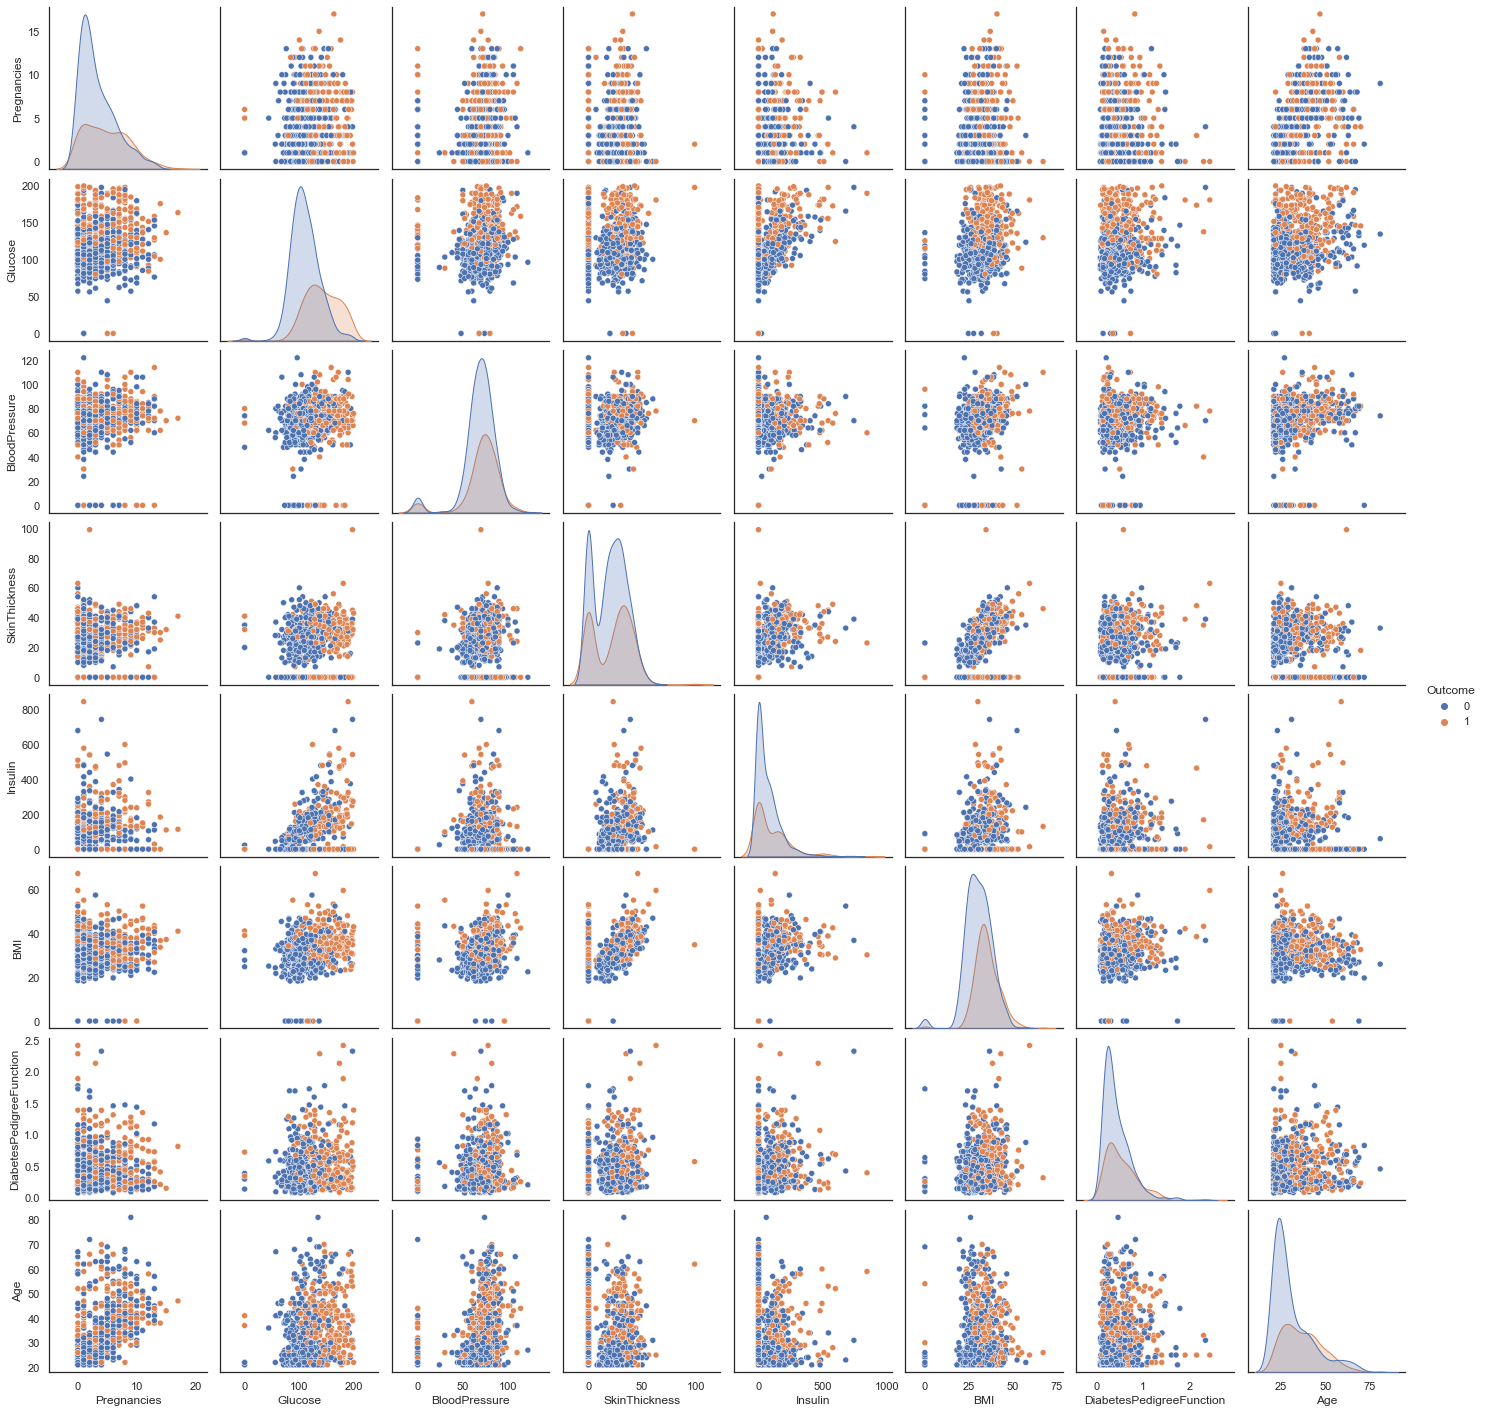

In [12]:
#Distribution of 'Outcome' with all other parameters
sns.pairplot(dataframe, hue = 'Outcome')

In [13]:
# Checking statistical data of Dataset(count - The number of not-empty values/mean - average/std - standard deviation/min - minimum value/25% - 25% percentile/50% - Median/75% - 75% percentile/max - maximum value)
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observations :

- Even though there is no missing data, features like Glucose, BloodPressure, SkinThickness, Insulin, BMI have 0 as a value
- This is not possible as a living human being cannot have such a low value for these parameters
- The Zero value for Pregnancies is acceptable 

In [14]:
#Replacing zero values of Columns : Glucose, BloodPressure, SkinThickness, Insulin and BMI with their median values
dataframe['Glucose'].replace(to_replace = 0, value = np.median(dataframe.Glucose), inplace = True)
dataframe['BloodPressure'].replace(to_replace = 0, value = np.median(dataframe.BloodPressure), inplace = True)
dataframe['SkinThickness'].replace(to_replace = 0, value = np.median(dataframe.SkinThickness), inplace = True)
dataframe['Insulin'].replace(to_replace = 0, value = np.median(dataframe.Insulin), inplace = True)
dataframe['BMI'].replace(to_replace = 0, value = np.median(dataframe.BMI), inplace = True)

In [15]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Observations : 
- The minimum values for Glucose, BloodPressure, SkinThickness, Insulin and BMI columns are replaced with their Medians.


In [35]:
#Prints null values in each column
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
dataframe.isnull().sum().sum()

0

<AxesSubplot:>

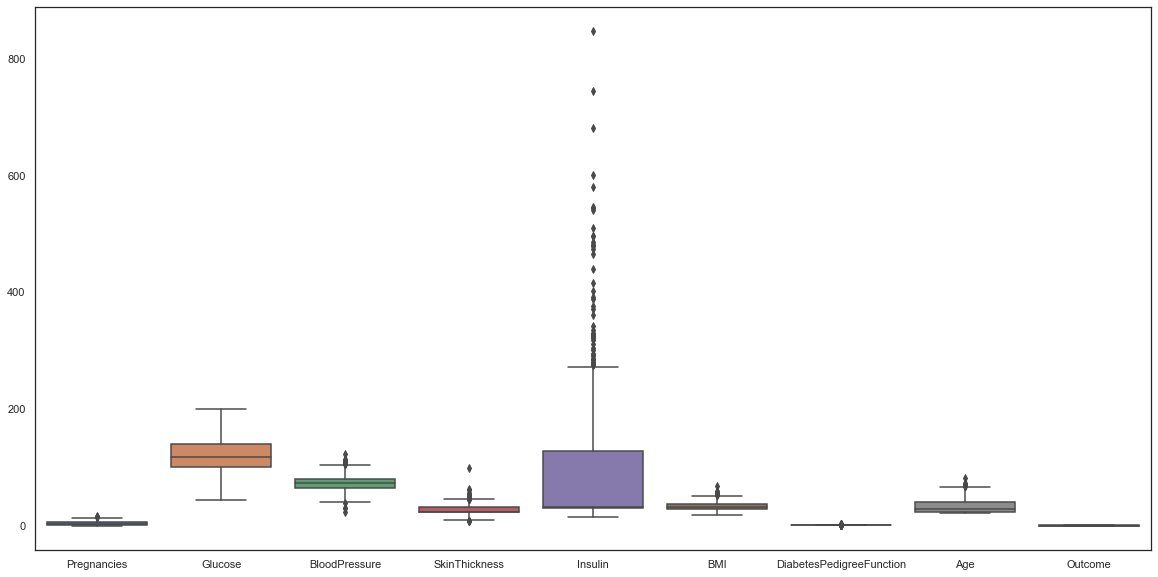

In [17]:
# Observing the outliners for all columns
plt.figure(figsize = (20, 10))
sns.boxplot(data = dataframe)

#### Observations :

- Lot of outliners in Insulin column. 
- Changing them will cause data integrity issues and impact on outcome.

<AxesSubplot:>

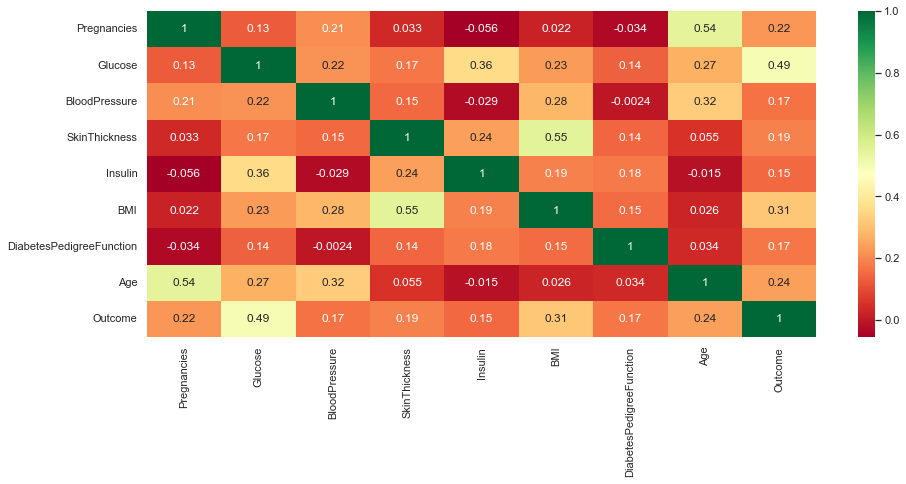

In [18]:
#Plotting a correlation matrix:
plt.figure(figsize = (15, 6))
sns.heatmap(dataframe.corr(), annot = True, cmap = 'RdYlGn')

#### Observations :

- Glucose, BMI and Age are highly correlated to Outcome compared to other columns.
- BloodPressure, Insulin and DiabetesPedigreeFunction are slightly correlated to Outcome.